# Evaluate Model Performance
In this notebook, the model predictions are compared with the ground truth data for the validation set. We get a leaderboard score for a range of confidence scores.
We can also see the results for individual image and visualize the original and predicted bounding boxes.

**We do NOT need a GPU for this notebook**

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import sys

pd.options.display.max_rows = 150

In [2]:
sys.path.append('../src')  # Add the source directory to the PYTHONPATH. This allows to import local functions and modules.

In [3]:
from gdsc_util import PROJECT_DIR
from gdsc_util import load_sections_df
from PredictionEvaluator import PredictionEvaluator
from gdsc_score import get_leaderboard_score

In [4]:
data_folder = str(PROJECT_DIR / 'data')

In [5]:
ground_truth = load_sections_df(f'../src/gdsc_val_dataset_10.csv')   # Load Ground truth data

In [6]:
# Load model prediction for whole dataset and filter to get only predictions for validation set
with open(f'{PROJECT_DIR}/experiment_frcnn_5k_r101_epoch_24.txt', 'r') as f:
    experiment_name = f.read()
    
predictions = pd.read_csv(f'{data_folder}/{experiment_name}/results_train_epoch_24.csv', delimiter=';', index_col=['section_id'])
validation_predictions = predictions[predictions['file_name'].isin(list(ground_truth['file_name']))].copy()

In [7]:
# Evaluate model performance for different confidence scores
confidence_scores = np.arange(0.3,0.7,0.05)
evaluator = PredictionEvaluator(ground_truth)
thresholds = [0.5, 0.6, 0.7]
leaderboard_scores = []
for con_score in confidence_scores:
    print(f'Calculating Score for Confidence score - {con_score:.2f}')
    restricted_df = validation_predictions[validation_predictions.detection_score>con_score]
    score_dict = get_leaderboard_score(restricted_df, thresholds, evaluator)
    leaderboard_scores.append({'Confidence Score' : con_score, 'Leaderboard Score' : score_dict['score'],
                              'Actual Worms Count' : len(ground_truth), 'Predicted Worms Count' : len(restricted_df)})
leaderboard_scores_df = pd.DataFrame(leaderboard_scores)

Calculating Score for Confidence score - 0.30
2022-08-16 16:28:23,884 - gdsc_score - INFO - Computing results for threshold: 0.5
2022-08-16 16:28:23,886 - PredictionEvaluator - INFO - Matching sections
2022-08-16 16:28:28,580 - PredictionEvaluator - INFO - Merging matched sections
2022-08-16 16:28:28,605 - PredictionEvaluator - INFO - Done matching sections
2022-08-16 16:28:28,607 - PredictionEvaluator - INFO - Evaluating predictions
2022-08-16 16:28:28,607 - PredictionEvaluator - INFO - Computing overall scores
2022-08-16 16:28:28,612 - gdsc_score - INFO - Computing results for threshold: 0.6
2022-08-16 16:28:28,613 - PredictionEvaluator - INFO - Matching sections
2022-08-16 16:28:33,315 - PredictionEvaluator - INFO - Merging matched sections
2022-08-16 16:28:33,339 - PredictionEvaluator - INFO - Done matching sections
2022-08-16 16:28:33,341 - PredictionEvaluator - INFO - Evaluating predictions
2022-08-16 16:28:33,342 - PredictionEvaluator - INFO - Computing overall scores
2022-08-16

In [8]:
leaderboard_scores_df

Confidence Score  Leaderboard Score  Actual Worms Count  \
0              0.30             239.77                7155   
1              0.35             241.93                7155   
2              0.40             243.86                7155   
3              0.45             245.16                7155   
4              0.50             246.26                7155   
5              0.55             247.31                7155   
6              0.60             247.45                7155   
7              0.65             247.40                7155   

   Predicted Worms Count  
0                   7723  
1                   7609  
2                   7507  
3                   7409  
4                   7314  
5                   7206  
6                   7112  
7                   7017

In [9]:
# Detailed model evaluation
matched_section_df = evaluator.match_sections(validation_predictions[validation_predictions.detection_score>0.55],
                                              iou_threshold=0.5)
results_df = evaluator.evaluate_predictions(matched_section_df=matched_section_df, detailed_evaluation=True)

2022-08-16 16:30:16,691 - PredictionEvaluator - INFO - Matching sections
2022-08-16 16:30:21,185 - PredictionEvaluator - INFO - Merging matched sections
2022-08-16 16:30:21,207 - PredictionEvaluator - INFO - Done matching sections
2022-08-16 16:30:21,211 - PredictionEvaluator - INFO - Evaluating detailed predictions
2022-08-16 16:30:21,212 - PredictionEvaluator - INFO - Computing overall scores
2022-08-16 16:30:21,223 - PredictionEvaluator - INFO - Evaluating predictions for file 112_A.jpg
2022-08-16 16:30:21,230 - PredictionEvaluator - INFO - Evaluating predictions for file 113_A.jpg
2022-08-16 16:30:21,234 - PredictionEvaluator - INFO - Evaluating predictions for file 114_A.jpg
2022-08-16 16:30:21,239 - PredictionEvaluator - INFO - Evaluating predictions for file 122_B.jpg
2022-08-16 16:30:21,243 - PredictionEvaluator - INFO - Evaluating predictions for file 123_B.jpg
2022-08-16 16:30:21,248 - PredictionEvaluator - INFO - Evaluating predictions for file 124_B.jpg
2022-08-16 16:30:21,

In [10]:
results_df

detection_acc  detection_tp  detection_fp  detection_fn   file_name
0           86.92          6687           538           468    overview
1           88.68            94             9             3   112_A.jpg
2           71.24           218            35            53   113_A.jpg
3           50.56            90            36            52   114_A.jpg
4           70.59            24             1             9   122_B.jpg
5           64.71            11             5             1   123_B.jpg
6           60.00            21             2            12   124_B.jpg
7           42.11            16             2            20   124_D.jpg
8           79.38            77            18             2   127_D.jpg
9           86.00            86            12             2   130_A.jpg
10          81.65           129            10            19   139_A.jpg
11          88.71           220            16            12    13_D.jpg
12          81.82            18             3             1   161_A.jpg
13          94.86           166             7             2   167_A.jpg
14          96.72           118             3             1    16_A.jpg
15          92.86            52             3             1   174_A.jpg
16          95.45           105             3             2   179_A.jpg
17          91.87           113             7             3   188_A.jpg
18         100.00             4             0             0   190_B.jpg
19          74.12            63            14             8    19_A.jpg
20          96.88            31             0             1    20_D.jpg
21          83.14           143             9            20   212_A.jpg
22          82.26            51             3             8   221_B.jpg
23          50.00             1             1             0   235_D.jpg
24           0.00             0             0             3    23_C.jpg
25          81.82            18             0             4   241_A.jpg
26          81.90            95            14             7   248_A.jpg
27          85.71            18             2             1    24_C.jpg
28          85.63           149            17             8   252_A.jpg
29          90.32            28             2             1   254_A.jpg
30          82.14            69             6             9    25_C.jpg
31          81.25            39             1             8    26_A.jpg
32          90.67            68             6             1   274_B.jpg
33          99.07           106             0             1   276_B.jpg
34         100.00             9             0             0   277_A.jpg
35          95.41           104             2             3   281_B.jpg
36          94.74            36             2             0   282_A.jpg
37         100.00            59             0             0   283_A.jpg
38          97.37            37             0             1  285_DD.jpg
39          96.26           180             5             2  286_DD.jpg
40          95.06            77             1             3   288_B.jpg
41          81.67            49             8             3  290_DD.jpg
42          93.10            54             4             0   291_A.jpg
43          96.43           135             2             3   292_B.jpg
44          92.47            86             5             2   300_B.jpg
45          94.12            32             1             1   302_B.jpg
46          66.67            24            10             2   308_A.jpg
47          90.35           103             8             3   316_D.jpg
48          79.25            42             9             2    31_D.jpg
49          90.70           117             6             6   322_D.jpg
50          75.00            18             6             0   327_D.jpg
51          78.21            61            11             6   328_A.jpg
52          88.37            38             3             2   332_A.jpg
53          76.19            32             5             5   332_B.jpg
54          89.86            62             

In [11]:
# Plot the predicted worm boxes.
def plt_inf_img(img_name, ground_truth, predictions):
    ground_truth_file = ground_truth[ground_truth.file_name == img_name]
    example_prediction = predictions[predictions.file_name == img_name]
    img_name = Image.open(f'{PROJECT_DIR}/data/jpgs/{img_name}') 
    plt.figure(figsize=(20,20))  # Set the size of the image
    plt.imshow(img_name)  # Show the image
    ax = plt.gca()  # Get the axis
    # Draw the boxes for all worm sections
    for row in example_prediction.itertuples():
        # Create a Rectangle patch
        width = row.xmax - row.xmin
        height = row.ymax - row.ymin
        rect = Rectangle((row.xmin,row.ymin),width,height,linewidth=1,edgecolor='b',facecolor='none')  # define rectangle
        ax.add_patch(rect)  # Add the rectangle to the axis  
        ax.text(row.xmax,row.ymin,str(round(row.detection_score,3)),color='black',fontsize=10,weight='bold')#.set_path_effects([patheffects.Stroke(linewidth=4, foreground='black'), patheffects.Normal()])
        
    # Draw the boxes for all worm sections
    for row in ground_truth_file.itertuples():
        # Create a Rectangle patch
        width = row.xmax - row.xmin
        height = row.ymax - row.ymin
        rect = Rectangle((row.xmin,row.ymin),width,height,linewidth=1,edgecolor='r',facecolor='none')  # define rectangle
        ax.add_patch(rect)  # Add the rectangle to the axis
    plt.show()

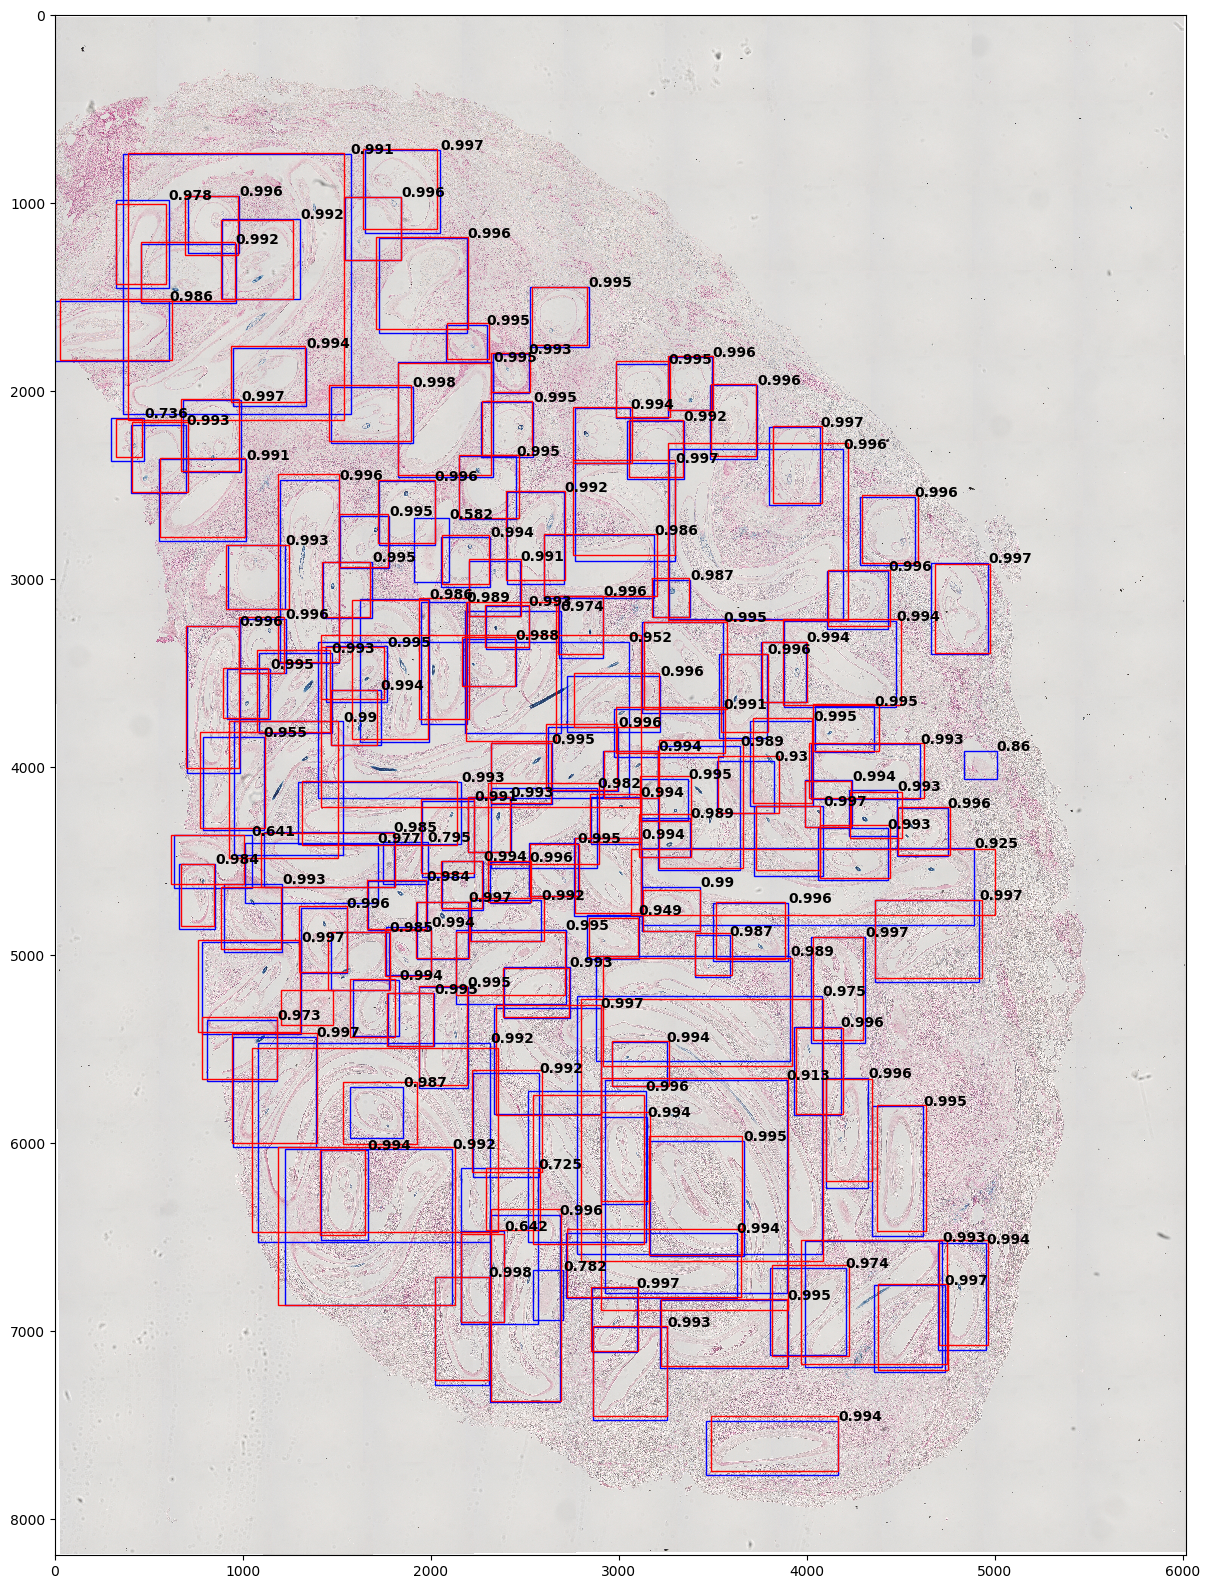

In [12]:
plt_inf_img('75_C.jpg', ground_truth, validation_predictions[validation_predictions.detection_score>0.55])